# <center>Predict customer buying behaviour

In [1]:
import pandas as pd
import numpy as np 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import RocCurveDisplay,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv("./customer_booking.csv",encoding='latin')
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
data.shape

(50000, 14)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [6]:
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [7]:
data.duplicated().sum()

719

 ##### Here I'm not deleting any duplicates here

In [8]:
data.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [9]:
data.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

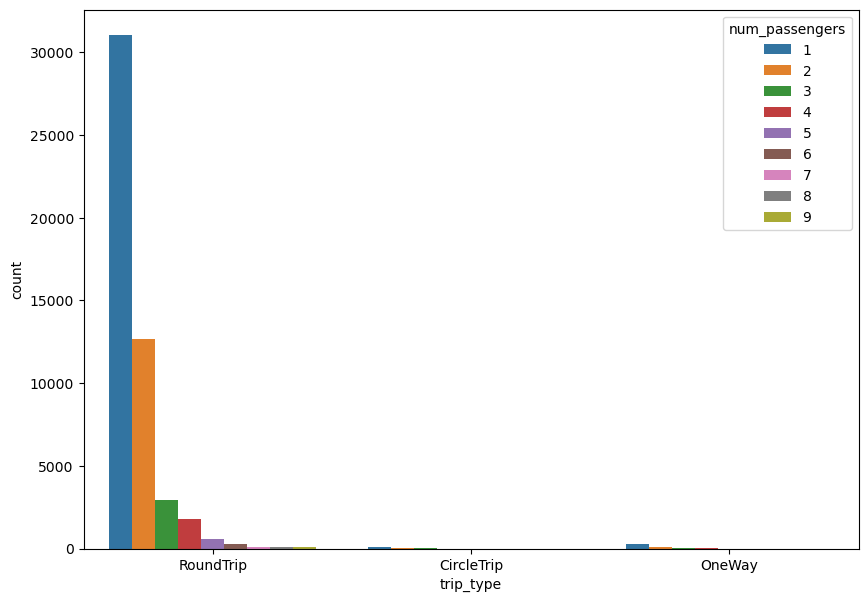

In [10]:
fig = plt.figure(figsize =(10, 7))
sns.countplot(x ='trip_type', data = data,hue = "num_passengers")
 
plt.show()

### Categorical to numerical valiues

In [11]:
le = LabelEncoder()

In [12]:
for i in data.columns:
    if(data[i].dtype == 'object'):
        data[i]=le.fit_transform(data[i])
    

In [13]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


### Splitting Data

In [14]:
x = data.drop('booking_complete',axis=1)
y =data[['booking_complete']]

In [15]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

route                    0.053326
booking_origin           0.041952
flight_duration          0.018784
trip_type                0.010441
length_of_stay           0.007921
wants_extra_baggage      0.005937
wants_preferred_seat     0.003454
purchase_lead            0.003327
flight_hour              0.002632
num_passengers           0.002089
wants_in_flight_meals    0.001836
flight_day               0.000547
sales_channel            0.000236
Name: MI Scores, dtype: float64

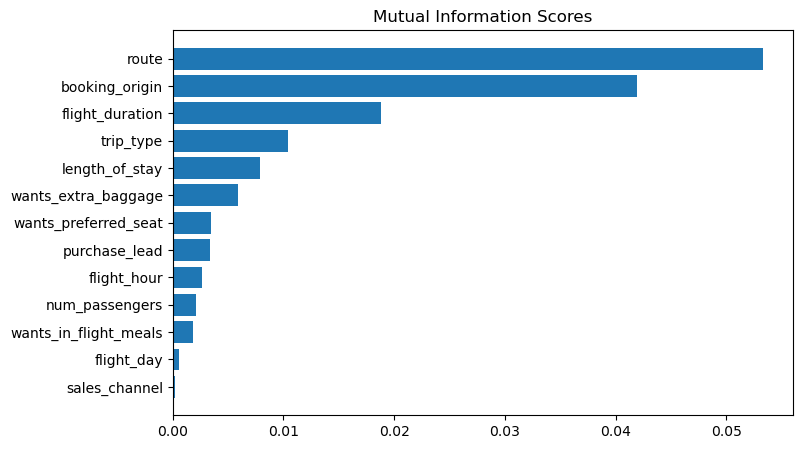

In [16]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
     

### Standard Scaler

In [17]:
sc =StandardScaler()

In [18]:
x =sc.fit_transform(x)

In [19]:
models = {
   "LogisticRegression" : LogisticRegression(),
   "DecisionTreeClassifier"     : DecisionTreeClassifier(),
   "RandomForestClassifier"     : RandomForestClassifier(random_state=1),
   "KNeighborsClassifier"       : KNeighborsClassifier(),
   "GradientBoostingClassifier" : GradientBoostingClassifier(),
   "AdaBoostClassifier"         : AdaBoostClassifier(),
    "XGBClassifier"             :XGBClassifier()
}

In [20]:
for name,model in models.items():
    score = cross_val_score(model,x,y,scoring="accuracy",cv =10,n_jobs=-1 )
    print("Cross Validation  :{}".format(name))
    print("Mean Score        : ",np.mean(score)*100)
    print("*"*100)

Cross Validation  :LogisticRegression
Mean Score        :  85.042
****************************************************************************************************
Cross Validation  :DecisionTreeClassifier
Mean Score        :  29.897999999999996
****************************************************************************************************
Cross Validation  :RandomForestClassifier
Mean Score        :  48.43400000000001
****************************************************************************************************
Cross Validation  :KNeighborsClassifier
Mean Score        :  80.072
****************************************************************************************************
Cross Validation  :GradientBoostingClassifier
Mean Score        :  49.925999999999995
****************************************************************************************************
Cross Validation  :AdaBoostClassifier
Mean Score        :  76.894
**********************************************

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) 

In [22]:
x_train.shape

(40000, 13)

### Logistic Regression

In [23]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [24]:
preds= model.predict(x_test)

In [25]:
print('ACCURACY          : ',accuracy_score(y_test,preds)*100)
print('AUC score         : ',roc_auc_score(y_test,preds))

ACCURACY          :  85.11
AUC score         :  0.5


### DecisionTreeClassifier()

In [26]:
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
D_pred = model1.predict(x_test)
D_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
print('ACCURACY          : ',accuracy_score(y_test,D_pred)*100)
print('AUC score         : ',roc_auc_score(y_test,D_pred))

ACCURACY          :  77.64
AUC score         :  0.5866053798825034


### RandomForestClassifier

In [29]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
R_pred = model2.predict(x_test)
print(R_pred)
print('ACCURACY          : ',accuracy_score(y_test,R_pred)*100)
print('AUC score         : ',roc_auc_score(y_test,R_pred))

[0 0 0 ... 1 0 0]
ACCURACY          :  77.74
AUC score         :  0.5860846615832125


### KNeighborsClassifier

In [30]:
model3 = KNeighborsClassifier()
model3.fit(x_train,y_train)
K_pred = model3.predict(x_test)
print(K_pred)
print('ACCURACY          : ',accuracy_score(y_test,K_pred)*100)
print('AUC score         : ',roc_auc_score(y_test,K_pred))

[0 0 0 ... 0 0 0]
ACCURACY          :  82.57
AUC score         :  0.5299599641091816


### GradientBoostingClassifier

In [31]:
model4 = GradientBoostingClassifier()
model4.fit(x_train,y_train)
G_pred = model4.predict(x_test)
print(G_pred)
print('ACCURACY          : ',accuracy_score(y_test,G_pred)*100)
print('AUC score         : ',roc_auc_score(y_test,G_pred))

[0 0 0 ... 0 0 0]
ACCURACY          :  85.09
AUC score         :  0.5156742599688674


### AdaBoostClassifier

In [32]:
model5 = AdaBoostClassifier()
model5.fit(x_train,y_train)
A_pred = model5.predict(x_test)
print(A_pred)
print('ACCURACY          : ',accuracy_score(y_test,A_pred)*100)
print('AUC score         : ',roc_auc_score(y_test,K_pred))

[0 0 0 ... 0 0 0]
ACCURACY          :  85.08
AUC score         :  0.5299599641091816


### XGBClassifier

In [33]:
model6 = XGBClassifier()
model6.fit(x_train,y_train)
X_pred = model6.predict(x_test)
print(X_pred)
print('ACCURACY          : ',accuracy_score(y_test,X_pred)*100)
print('AUC score         : ',roc_auc_score(y_test,X_pred))

[0 0 0 ... 0 0 0]
ACCURACY          :  85.17
AUC score         :  0.5499441366085797
